# Discussion 4 - Backpropagation, Hyper-Parameters, Deep Neural Networks

### Goals

- Artificial Neural Networks
    - Feed-Forward Step
    - Back Propagation
- Deep Neural Networks
    - Use Keras in building layers
- Hyperparameter Tuning

Instructor : Bharath Kinnal

__Tip :__ How to run system commands on Jupyter Notebook

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

!date
!pwd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Friday 02 July 2021 12:50:00 PM PDT
/home/bharath


## Artificial Neural Networks

A neural network, also called a Multi-Layer-Perceptron (MLP), consists of a layered, feedforward, completely-connected network of neurons. There are mainly 3 types of layers in a neural network :
- __Input layer :__ The number of nodes depends on the number and types of dataset attributes
- __Output layer :__ The number of nodes may be more than 1 depending on the classification task.
- __Hidden layer :__ The number of nodes depends on the complexity of the pattern, and is determined mainly through trial and error. A neural network without a hidden layer is a perceptron model. 

### Feed-Forward Step

Given an input $X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$ to a neuron, the output $y$ can be calcluated as follows :

$$z = W^T X = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

$$y = Act(z)
%     \begin{cases}
%       1 & \text{if $Act(z) \ge threshold$}\\
%       0 & \text{if $ < threshold$}
%     \end{cases}$$

Here, $Act()$ is the activation function used by the neuron, and $W = \begin{pmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_n \end{pmatrix}$ are the weights associated with the neuron. 

In [105]:
import numpy as np
import pandas as pd
import random
from random import seed
from sklearn.datasets import load_iris

iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
Y = iris_data.target

X = X.to_numpy()

#Data-preprocessing
def min_max_normalization(X) :
    X = (X - X.min()) / (X.max() - X.min())
    return X
def one_hot_encoding(y) :
    y_values = np.max(y) + 1
    return np.eye(y_values)[y]

for i in range(X.shape[1]):
    X[:,i] = min_max_normalization(X[:,i])
print(X)

Y = one_hot_encoding(Y)
print(Y)

X = X.tolist()
Y = Y.tolist()

# Shuffling the data
X = list(zip(X,Y))
random.shuffle(X)
X, Y = zip(*X)

X = list(X)
Y = list(Y)

print(Y)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [93]:
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

seed(1)
network = initialize_network(4, 5, 3)
for i in range(len(network)):
    print('Weights in Layer :', i)
    for neuron in network[i] :
        print(neuron['weights'])


Weights in Layer : 0
[0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095]
[0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631]
[0.8357651039198697, 0.43276706790505337, 0.762280082457942, 0.0021060533511106927, 0.4453871940548014]
[0.7215400323407826, 0.22876222127045265, 0.9452706955539223, 0.9014274576114836, 0.030589983033553536]
[0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243, 0.21659939713061338]
Weights in Layer : 1
[0.4221165755827173, 0.029040787574867943, 0.22169166627303505, 0.43788759365057206, 0.49581224138185065, 0.23308445025757263]
[0.2308665415409843, 0.2187810373376886, 0.4596034657377336, 0.28978161459048557, 0.021489705265908876, 0.8375779756625729]
[0.5564543226524334, 0.6422943629324456, 0.1859062658947177, 0.9925434121760651, 0.8599465287952899, 0.12088995980580641]


In [94]:
# Calculate combination function as dot product of input and weights
def combination_function(weights, inputs):
    #Adding bias
    combination = float(weights[-1])
    
    for i in range(len(weights)-1):
        combination += weights[i] * inputs[i]
    
    return combination

In [95]:
from math import exp
# Activation function
def activation(combination):
    return 1.0 / (1.0 + exp(-combination))

In [96]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            combination = combination_function(neuron['weights'], inputs)
            neuron['output'] = activation(combination)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [97]:
# Test forward propagation

row = X[0]
output = forward_propagate(network, row)
print('Forward Propagation Output = ', output)

for i in range(len(network)):
    print('Output in Layer :', i)
    for neuron in network[i] :
        print(neuron['output'])


Forward Propagation Output =  [0.8414383360939448, 0.8738768630702981, 0.9522923544316032]
Output in Layer : 0
0.8971869747981891
0.85355013958649
0.9092964742781457
0.9243165270727403
0.8592955762479105
Output in Layer : 1
0.8414383360939448
0.8738768630702981
0.9522923544316032


## Back Propagation

Back propagation is a weight-optimization technique done by relaying the error obtained in the output layer to all other layers in the neural network.

Consider a neural network with combination function $h(X,W) = X^T W$, and activation function $a(x) = sigmoid(x)$.

We can define the error in the neural network to be sum of all the errors obtained in the output layer, which is given as half the sum of squared errors as follows :

$$E_n^o = \frac{1}{2} (\hat{a_n^o} - a_n^o)^2$$

$$\text{Error in the output layer, }E^o = \frac{1}{2} (\hat{a^o} - a^o)^2$$

$$\text{Error in the neural network, }E = sum(E^o) = \frac{1}{2} \sum_{n=1}^{N} (\hat{a^o_n} - a^o_n)^2$$

We can define the error in the any given layer (other that the output layer) as the weighted sum of errors obtained in the next layer as follows :

$$\text{Error between node $j$ and node $k$, }E^h_{jk} = (a^h_j w^h_{jk}) E^{h+1}_{k}$$

$$\text{Error in node $j$, }E^h_{j} = a^h_j \sum_{k=1}^{K} w^h_{jk} E^{h+1}_{k}$$

<!-- $$\text{Error in layer $h$, }E^h = \sum_{j=1}^{J} a_j \sum_{k=1}^{K} w_{jk} E^{h+1}_{k}$$ -->
$$\text{Error in layer $h$, }E^h = (W^h \cdot E^{h+1}) a^h $$

We can now define the updated weights using gradient descent :

$$W^{h} = W^{h} + \alpha \frac{\delta E^{h}(W^{h})}{\delta W^{h}}$$

And $\frac{\delta E^h(W^{h})}{\delta W^{h}}$ for a weight $W^h$ can be calculated as follows :

$$\frac{\delta E^h(W^{h})}{\delta W^{h}} = \frac{\delta E^h(W^{h})}{\delta a^h(W^{h})}\frac{\delta a^h(W^{h})}{\delta W^{h}}$$

$$\frac{\delta E^h(W^{h})}{\delta a^h(W^{h})} = \begin{cases} (\hat{a^o} - a^o) & \text{For the output layer}\\ W^h \cdot E^{h+1} & \text{For all other layers} \\ \end{cases}$$

$$\frac{\delta a^h(W^h)}{\delta W^h} = a^h(W^h) (1 - a^h(W^h)) \quad \text{(only for sigmoid function)}$$

In [98]:
# Derivative of activation function (sigmoid function)
def activation_derivative(output):
    return output * (1.0 - output)

In [99]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i == len(network)-1:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        else:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * activation_derivative(neuron['output'])


In [100]:

expected = Y[0]
backward_propagate_error(network, expected)
for i in range(len(network)):
    print('Error derivative in Layer :', i)
    for neuron in network[i] :
        print(neuron['delta'])

Error derivative in Layer : 0
-0.006311107105524192
-0.002867562693822064
-0.005670419293796015
-0.005240952756045239
-0.006754822737706155
Error derivative in Layer : 1
-0.11226458722622669
-0.09631529209078207
0.002167435916658501


In [101]:
# Update network weights with error
def update_weights(network, inputs, l_rate):
    for i in range(len(network)):
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [102]:
# Train a network for a fixed number of epochs
def train_network(network, X, Y, l_rate, n_epoch):
    for epoch in range(n_epoch):
        sum_error = 0
        for (inputs, expected) in zip(X,Y):
            outputs = forward_propagate(network, inputs)
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, inputs, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [103]:
test_index = int(len(X) * 4/5)
X_train, X_test = X[:test_index], X[test_index:]
Y_train, Y_test = Y[:test_index], Y[test_index:]

>epoch=0, lrate=0.200, error=99.473
>epoch=1, lrate=0.200, error=78.842
>epoch=2, lrate=0.200, error=77.181
>epoch=3, lrate=0.200, error=74.888
>epoch=4, lrate=0.200, error=71.825
>epoch=5, lrate=0.200, error=68.009
>epoch=6, lrate=0.200, error=63.716
>epoch=7, lrate=0.200, error=59.406
>epoch=8, lrate=0.200, error=55.504
>epoch=9, lrate=0.200, error=52.232
>epoch=10, lrate=0.200, error=49.607
>epoch=11, lrate=0.200, error=47.536
>epoch=12, lrate=0.200, error=45.900
>epoch=13, lrate=0.200, error=44.588
>epoch=14, lrate=0.200, error=43.514
>epoch=15, lrate=0.200, error=42.615
>epoch=16, lrate=0.200, error=41.841
>epoch=17, lrate=0.200, error=41.161
>epoch=18, lrate=0.200, error=40.548
>epoch=19, lrate=0.200, error=39.984
>epoch=20, lrate=0.200, error=39.458
>epoch=21, lrate=0.200, error=38.958
>epoch=22, lrate=0.200, error=38.479
>epoch=23, lrate=0.200, error=38.013
>epoch=24, lrate=0.200, error=37.556
>epoch=25, lrate=0.200, error=37.104
>epoch=26, lrate=0.200, error=36.652
>epoch=27, 

In [ ]:
train_network(network, X_train, Y_train, 0.2, 50)

In [104]:
# Make a prediction with a network
def predict(network, inputs):
    outputs = forward_propagate(network, inputs)
    return outputs.index(max(outputs))

accuracy = 0
for (x,y) in zip(X_test,Y_test):
    prediction = predict(network, x)
    expected = y.index(max(y))
    print('Expected == Prediction : ', (expected == prediction))
    accuracy += (expected == prediction)

accuracy /= len(X_test)
print(accuracy)

Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  False
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
Expected == Prediction :  True
0.9666666666666667


## Deep Neural Networks

As the function to get the expected output from the input data becomes more complex, a more complex neural network is required. Deep neural network is a multi-layer perceptron model with multiple hidden layers, that can be used to model these complex functions.

Given a layer $l$ of a deep neural network consisting of $L$ layers, where the combination function used is $h_l(x)$ and the activation function used is $a_l(y)$, the output of the deep neural network will be as follows :

$$f(x) = a_L(h_L(a_{L-1}(h_{L-1}(\dots (a_1(h_1(x))) \dots))))$$



In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('ggplot')

# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


In [126]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data using Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]


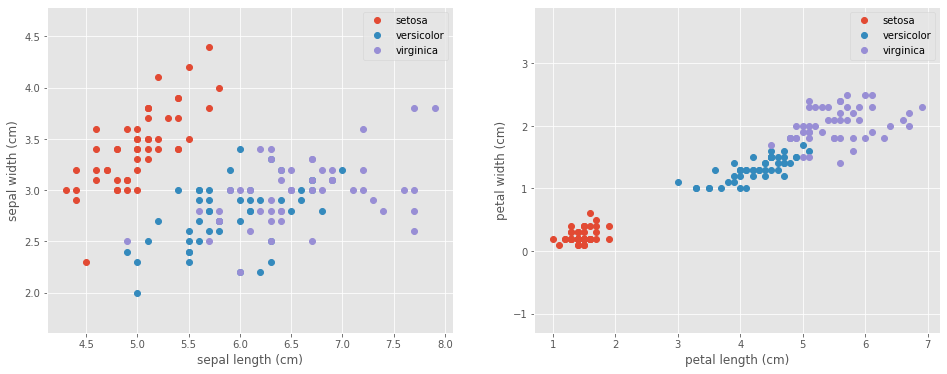

In [127]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend()

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend()

plt.show()

In [128]:

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
#             layers = [
#                 layers.Dense(2, activation="relu", name="layer1"),
#                 layers.Dense(3, activation="relu", name="layer2"),
#                 layers.Dense(4, name="layer3"),
#             ]
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='sigmoid'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='sgd', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_202 (Dense)            (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_204 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_205 (Dense)            (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

In [120]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))


Accuracy : 0.95 (+/- 0.07)


In [135]:
#from keras.callbacks import TensorBoard

history_dict = {}

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]


Model name: model_1
Test loss: 0.5641723871231079
Test accuracy: 0.8666666746139526
Model name: model_2
Test loss: 0.5608333945274353
Test accuracy: 0.6933333277702332
Model name: model_3
Test loss: 0.3610782325267792
Test accuracy: 0.9333333373069763


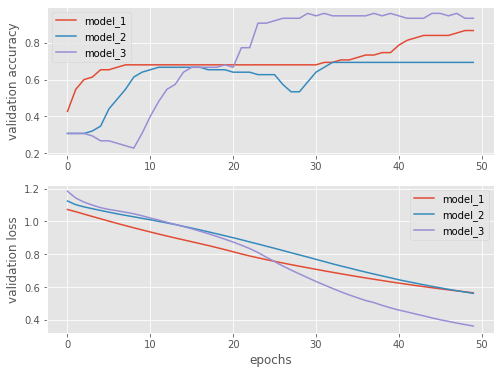

In [137]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();


## Hyperparameter Tuning

A hyperparameter is a parameter whose value is used to control the learning process in a machine learning model. The parameters of the model are those variables that are learned by the model during training.

Some examples of hyperparameters of a deep neural network are :
- Learning rate
- Number of epochs
- Activation Function
- Batch size
- Number of layers
- Number of neurons in each layer

An optimal set of hyperparameters for the machine learning model is mainly determined mainly through trial and error. There are different optimization methods that can be used to fine-tune the different hyperparameters for the given model, some of which are given below : 
- Grid Search
- Random Search
- Bayesian optimization
- Hyperband

### Grid Search

Grid Search is a hyperparameter tuning technique which tries to find the best combination of hyperparameters from every combination of a preset list of values of the hyper-parameters by evaluating the model for each combination. 

The pattern followed here is similar to a grid, where all the values are placed in the form of a matrix. Each set of parameters is taken into consideration and the accuracy is noted. Once all the combinations are evaluated, the model with the set of parameters which give the top accuracy is considered to be the best.

In [78]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

print(X)
print(y)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = MinMaxScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.fit_transform(X_test)

from sklearn.neural_network import MLPClassifier

mlp_gs = MLPClassifier(activation = 'relu', hidden_layer_sizes = (20,), solver = 'sgd')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [79]:
max_iter = [50 * n for n in range(1,11)]
learning_rate_init = [0.01 * n for n in range(1,11)]
parameter_space = {
    'max_iter' : max_iter,
    'learning_rate_init' : learning_rate_init
}

In [77]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, parameters, X, y):
    gridSearch = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5) 
    gridSearch.fit(X,y)
    params = gridSearch.best_params_
    score = gridSearch.best_score_
    return gridSearch, params, score

clf, params, score = grid_search(mlp_gs, parameter_space, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'learning_rate_init': 0.02, 'max_iter': 350}
Best score :
 0.9866666666666667


In [44]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

means = means.reshape((10, 10))
means = pd.DataFrame(means, index = learning_rate_init, columns = max_iter)
print(means.head())

0.967 (+/-0.060) for {'learning_rate_init': 0.01, 'max_iter': 50}
0.980 (+/-0.053) for {'learning_rate_init': 0.01, 'max_iter': 100}
0.973 (+/-0.050) for {'learning_rate_init': 0.01, 'max_iter': 150}
0.980 (+/-0.053) for {'learning_rate_init': 0.01, 'max_iter': 200}
0.967 (+/-0.060) for {'learning_rate_init': 0.01, 'max_iter': 250}
0.980 (+/-0.053) for {'learning_rate_init': 0.01, 'max_iter': 300}
0.980 (+/-0.053) for {'learning_rate_init': 0.01, 'max_iter': 350}
0.973 (+/-0.050) for {'learning_rate_init': 0.01, 'max_iter': 400}
0.987 (+/-0.033) for {'learning_rate_init': 0.01, 'max_iter': 450}
0.980 (+/-0.053) for {'learning_rate_init': 0.01, 'max_iter': 500}
0.980 (+/-0.053) for {'learning_rate_init': 0.02, 'max_iter': 50}
0.980 (+/-0.053) for {'learning_rate_init': 0.02, 'max_iter': 100}
0.973 (+/-0.050) for {'learning_rate_init': 0.02, 'max_iter': 150}
0.980 (+/-0.053) for {'learning_rate_init': 0.02, 'max_iter': 200}
0.967 (+/-0.060) for {'learning_rate_init': 0.02, 'max_iter': 25

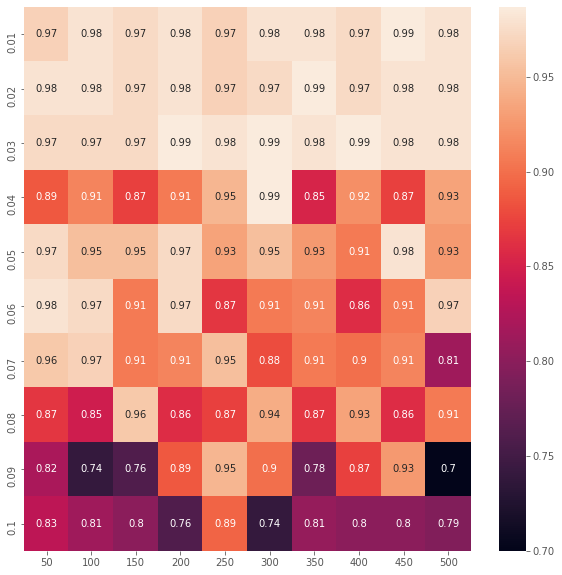

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
 
sns.heatmap(means, annot = True)

### Random Search

The drawback of grid search is that it suffers when the number of hyperparameters grows exponentially. With as few as four parameters this problem can become impractical, as the number of evaluations required for this strategy increases exponentially with each additional parameter.

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. 

To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

In [76]:
from sklearn.model_selection import RandomizedSearchCV

def random_search(clf, parameters, iterations, X, y):
    randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=5) 
    randomSearch.fit(X,y)
    params = randomSearch.best_params_
    score = randomSearch.best_score_
    return randomSearch, params, score

clf, params, score = random_search(mlp_gs, parameter_space, 20, X, y)

print('Best parameters found :\n', params)
print('Best score :\n', score)

Best parameters found :
 {'max_iter': 350, 'learning_rate_init': 0.01}
Best score :
 0.9866666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

